# CS145, Final Project | Pharma, Finance, and Healthcare


Exploring the relationship between drug/medical device companies and health care providers.

## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Shridhar Athinaryanan, shriathi*
* *Poojit Hegde, phegde8*

Autumn 2023


---




---


## 1: Project Overview

Within the realm of healthcare, the financial relationships between drug and medical device companies and healthcare providers stand as a critical facet, bearing implications for transparency and accountability. This project embarks on a journey through the labyrinth of these financial interactions, utilizing the Center for Medicare and Medicaid Services (CMS)'s Open Payments Data from the Program Year 2022. The dataset, comprising a staggering 14.11 million records and reflecting transactions totaling $12.59 billion, encapsulates a comprehensive snapshot of the monetary exchanges that transpired between January 1, 2022, and December 31, 2022.


The central question of our project is the following: "Given the characteristics of a transaction (transaction purpose, payer/recipient, state where the transaction was conducted, etc.), can we predict the price of the transaction?

At its core, the project is driven by a dual purpose: to discern trends and patterns within the financial landscape of healthcare and to forecast transaction amounts using both statistical and machine learning methodologies. The initial steps involve an exploration of the Open Payments data, unfolding the intricacies of its schema and unveiling key features that will lay the groundwork for subsequent analyses. We explore trends and patterns in the amount of value in transaction across geography, across different drug/medical device companies, and across payment type. The analysis of these sub-inquiries will inform what features we deem important in answering our central question. Using statistical and machine learning methods in BigQuery, we ultimately take on the task of predicting the transaction amount using other features of the data. Specifically, we build a KNN baseline for predicting the payment amount, and then we use linear regression for prediction. We compute IO costs, time, and monetary cost to compare perfomance. We finally suggest future directions for the project and ways to expand the work done here.




### 1.1: Dataset Description


---

The Open Payments Dataset contains information about the financial relationships between drug and medical device companies and certain health care providers, collected by OpenPaymentsData, a project of the US federal government. More specifically, the dataset offers insight into the financial transactions which happen between "reporting entities" (pharmaceutical companies and medical device manufacturers) and "covered recipients" (primarily physicians).

We chose to use the Open Payments Dataset due to their open-source, free access to the large amount of data on financial transactions. In comparison to another data source called "Dollars for Docs" which charges a fee of $250 for student access but contains multiple years of data compiled together, the Open Payment Dataset contains all the raw data for the transactions in a readily available manner.  

We consider the Open Payments data from 2022, which was published on June 30, 2023, and contains payments and transfers of value made between January 1, 2022 and December 31, 2022. This data is reported across three central categories:

General (13,148,520 rows and 91 columns, 6.12 GB): These payments are not in connection with a research agreement or protocol.

Research (953,320 rows and 252 columns, 537.69 MB): These payments are made in connection with a research agreement or protocol.

Ownership (3,919 rows and 30 columns, 1.58 MB): This table has information on the ownership or investment stakes which physicians or their immediate family members have with reporting entities.

Altogether, these data tables form our dataset. For our major analyses, we primarily use the general data, although we brielfy explored research and ownership data, before deciding to not use these sources for our prediction task. They contain a variety of information about payments from drug and medical device companies to health care providers. Some of the key features of the data include information about the recipient (name, location of practice, type of practitioner, etc), as well as information about the reporting entities (group purchasing organization name, date of payment, nature of payment), and the dollar amount of the transaction. For the research data, additional information about the type of research and principal investigators is also provided, and for the ownership data, the value of interest, and terms of interest are also provided. We delve more into the specifics in the following section.

We use a variety of subsets of this data for our interpretation, visualization, and analysis of our key questions.



----

### 1.2: General Payments Data



Our general payments dataset `general_data` is 13,148,520 rows and 91 columns, with size 6.12 GB. This contains all general (non-research, non-ownership related) payments from the 2022 program year.


The main columns used in our analysis are:
* `Covered_Recipient_NPI`: the National Provider Identifier (NPI) for the healthcare provider recipient of the payment
* `Recipient_State`: the state of the practice of the recipient
* `Covered_Recipient_Specialty_1`: the type of practice, such as dental, alleopathic & osteopathic, or opthamologic.
* `Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name`: the Pharmacy Group Purchasing Organizations (GPO) for the reporting entity (drug/medical device company).
* `Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State`: the state of the reporting entity
* `Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country`: the country of the reporting entity
* `Total_Amount_of_Payment_USDollars`: the US dollar amount of the transaction
* `Date_of_Payment`: The data of the payment in format MM/DD/YYYY
* `Related_Product_Indicator`: Whether there is a related product associated with the payment.
* `Covered_or_Noncovered_Indicator_1`: Whether the related product is covered or not covered by the payment.
* `Nature_of_Payment_or_Transfer_of_Value`


 The nature of these payments column falls under several categories: -
*  Acquisitions
*  Charitable contributions
*   Compensation for services other than consulting, including serving as faculty or as a speaker at an event other than a continuing education program
*   Compensation for serving as faculty or as a speaker for medical education program
*   Consulting fees
*   Debt Forgiveness
*   Education
*   Entertainment
*   Food and beverage
*   Gift
*   Grant
*   Honoraria
*   Long-term medical supply or device loan
*   Royalty or license
*   Travel and lodging
*   Space rental or facility fees


### 1.3: Research Payments Data



Our research payments dataset `research` is 953,320 rows and 252 columns, with 537.69 MB in size. This contains all research payments from the 2022 program year.


The main columns used in our analysis are:
* `Covered_Recipient_NPI`: the National Provider Identifier (NPI) for the healthcare provider recipient of the payment
* `Principal_Investigator_1_NPI`: the National Provider Identifier (NPI) for the principal investigator
* `Recipient_State`: the state of the practice of the recipient
* `Principal_Investigator_1_State`: the state of the practice of the principal investigator
* `Principal_Investigator_1_Specialty_1`: the type of practice, such as dental, alleopathic & osteopathic, or opthamologic.
* `Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name`: the Pharmacy Group Purchasing Organizations (GPO) for the reporting entity (drug/medical device company).
* `Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State`: the state of the reporting entity
* `Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country`: the country of the reporting entity
* `Total_Amount_of_Payment_USDollars`: the US dollar amount of the transaction
* `Date_of_Payment`: The data of the payment in format MM/DD/YYYY
* `Related_Product_Indicator`: Whether there is a related product associated with the payment.
* `Covered_or_Noncovered_Indicator_1`: Whether the related product is covered or not covered by the payment.



### 1.4: Ownership Payments Data



Our ownership payments dataset `ownership` is much smaller, with 3,919 rows and 30 columns, with a size of 1.58 MB. This contains all ownership and investment payments from the 2022 program year.


The main columns used in our analysis are:
* `Physician_NPI`: the National Provider Identifier (NPI) for the healthcare provider recipient of the payment
* `Recipient_State`: the state of the practice of the recipient
* `Physician_Specialty`: the type of practice, such as dental, alleopathic & osteopathic, or opthamologic.
* `Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name`: the Pharmacy Group Purchasing Organizations (GPO) for the reporting entity (drug/medical device company).
* `Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State`: the state of the reporting entity
* `Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country`: the country of the reporting entity
* `Total_Amount_Invested_USDollars`: the US dollar amount of the transaction
* `Date_of_Payment`: the data of the payment in format MM/DD/YYYY
* `Value_of_Interest`: the US dollar amount of interest
* `Terms_of_Interest`: the terms of the interest, such as common stock or shares




### 1.5: Data Considerations



The three data tables contain different columns, and there is no unique key that connects them, so joining them is a challenge.
All the data tables contain the NPI for the physician / healthcare provider, with the column name as `Covered_Recipient_NPI` or `Physician_NPI`. In the analyses that involve joining the data tables, it is along these columns that we join. In addition, we also join across the the `Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name` column for another part of the analysis, grouping by the drug/medical device company. Lastly, we also group by the state of the recipient. For most of our analyses, we do only use the general payments `general_data` data table.



---




---


## 2. Jumping Into the Data

In this section, we dive into the data, visualizing what it shows us, and discerning some useful features.

### 2.1: Dependencies and Setup

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs-145-project-22-401302"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
# Installations
!pip install -U plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
# We need latest version of plotly
import plotly.express as px
from urllib.request import urlopen
import json
%matplotlib inline

We have three tables — let's explore them one at a time.



### 2.2: Exploring General Payments `general_data`
(payments are not in connection with a research agreement or protocol)

We can take an initial peek into this table:

In [ ]:
%%bigquery --project $project_id

SELECT * FROM `cs-145-project-22-401302.finalproject.general` LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Covered_Recipient_Profile_ID,Covered_Recipient_NPI,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,...,Associated_Drug_or_Biological_NDC_4,Associated_Device_or_Medical_Supply_PDI_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Associated_Device_or_Medical_Supply_PDI_5,Program_Year,Payment_Publication_Date
0,NEW,Covered Recipient Physician,<NA>,<NA>,None,765942,1144201047,CRAIG,M,MCDONALD,...,None,<NA>,None,None,None,None,None,<NA>,2022,2023-06-30
1,NEW,Covered Recipient Physician,<NA>,<NA>,None,145236,1184949182,MIGVIS,None,MONDUY,...,None,<NA>,None,None,None,None,None,<NA>,2022,2023-06-30
2,NEW,Covered Recipient Non-Physician Practitioner,<NA>,<NA>,None,10684216,1619300845,KARA,ELIZABETH,GODWIN,...,None,<NA>,None,None,None,None,None,<NA>,2022,2023-06-30
3,NEW,Covered Recipient Physician,<NA>,<NA>,None,49378,1104844695,HENRY,None,KAMINSKI,...,None,<NA>,None,None,None,None,None,<NA>,2022,2023-06-30
4,NEW,Covered Recipient Teaching Hospital,460009,12552,U Of U Hospitals & Clinics,<NA>,<NA>,None,None,None,...,None,<NA>,None,None,None,None,None,<NA>,2022,2023-06-30


We can query the number of payments for each category of payment type and the total cost within each category.

In [ ]:
%%bigquery frequency_and_cost_of_general_payments --project $project_id

SELECT Nature_of_Payment_or_Transfer_of_Value AS payment_type, COUNT(Total_Amount_of_Payment_USDollars) AS number_of_transactions, SUM(Total_Amount_of_Payment_USDollars) AS total_cost
FROM `cs-145-project-22-401302.finalproject.general`
GROUP BY Nature_of_Payment_or_Transfer_of_Value


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
#Data preview
frequency_and_cost_of_general_payments

,payment_type,number_of_transactions,total_cost
0,Compensation for services other than consultin...,227641,5.303006e+08
1,Space rental or facility fees (teaching hospit...,7068,2.298963e+07
2,Debt forgiveness,6094,1.613534e+07
3,Current or prospective ownership or investment...,715,1.728572e+07
4,Gift,34344,7.186073e+06
5,Royalty or License,15500,1.347975e+09
6,Travel and Lodging,463973,1.508777e+08
7,Honoraria,18436,4.404244e+07
8,Grant,6496,1.096002e+08
9,Education,158751,7.372466e+07


The following are the all of the types of general transactions which have occurred in 2022.

In [ ]:
for elem in frequency_and_cost_of_general_payments.payment_type:
  print(elem)

Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program
Space rental or facility fees (teaching hospital only)
Debt forgiveness
Current or prospective ownership or investment interest
Gift
Royalty or License
Travel and Lodging
Honoraria
Grant
Education
Long term medical supply or device loan
Consulting Fee
Food and Beverage
Acquisitions
Charitable Contribution
Entertainment
Compensation for serving as faculty or as a speaker for a medical education program


Using the query above, we can plot bar charts of the frequency of each transaction type and the total summed cost for each transaction type.

Frequency of Each Type of Transaction

<BarContainer object of 17 artists>

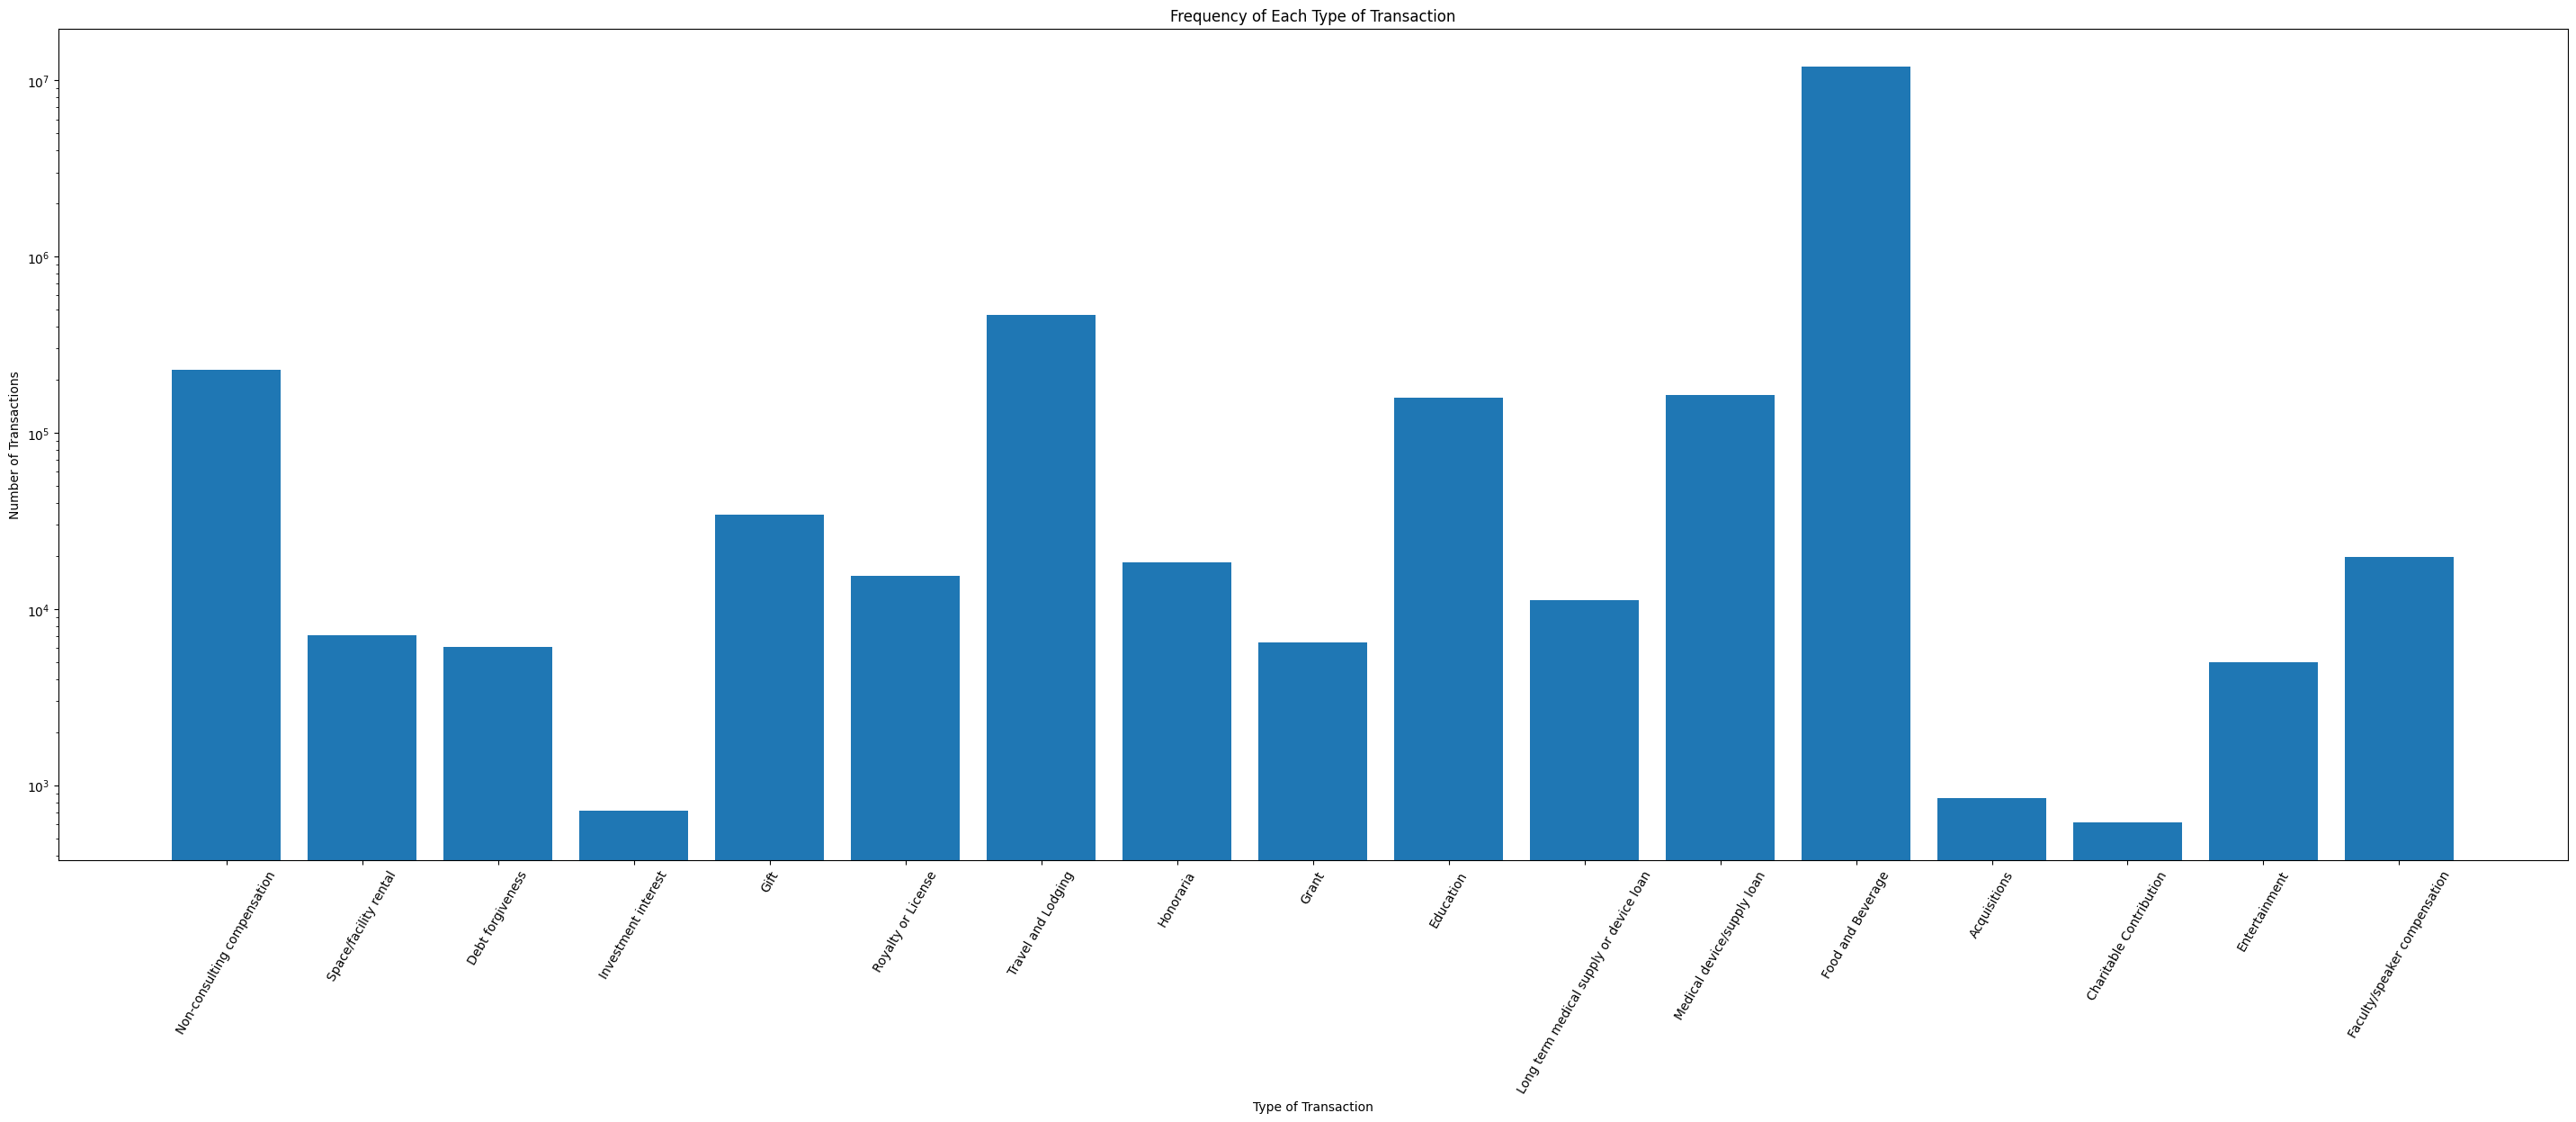

In [ ]:
pd.options.mode.chained_assignment = None

plt.figure(figsize = (36, 12))
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Transactions")
plt.title("Frequency of Each Type of Transaction")
plt.xticks(rotation=60)
plt.yscale('log')

#Rename certain payment types for brevity, preventing overlapping of x-tickers
frequency_and_cost_of_general_payments.payment_type.iloc[16] = "Faculty/speaker compensation" #Compensation for serving as faculty or as a speaker for a medical education program
frequency_and_cost_of_general_payments.payment_type.iloc[0] = "Non-consulting compensation" #Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program
frequency_and_cost_of_general_payments.payment_type.iloc[1] = "Space/facility rental" #Space rental or facility fees (teaching hospital only)
frequency_and_cost_of_general_payments.payment_type.iloc[3] = "Investment interest" #Current or prospective ownership or investment interest
frequency_and_cost_of_general_payments.payment_type.iloc[11] = "Medical device/supply loan" #Long term medical supply or device loan


plt.bar(frequency_and_cost_of_general_payments.payment_type,
            frequency_and_cost_of_general_payments.number_of_transactions, align='center')


From this, we can see that food and beverage is the most frequent type of transaction, followed by travel and lodging expenses and non-consulting compensation.

Total Summed Cost of Each Type of Transaction

<BarContainer object of 17 artists>

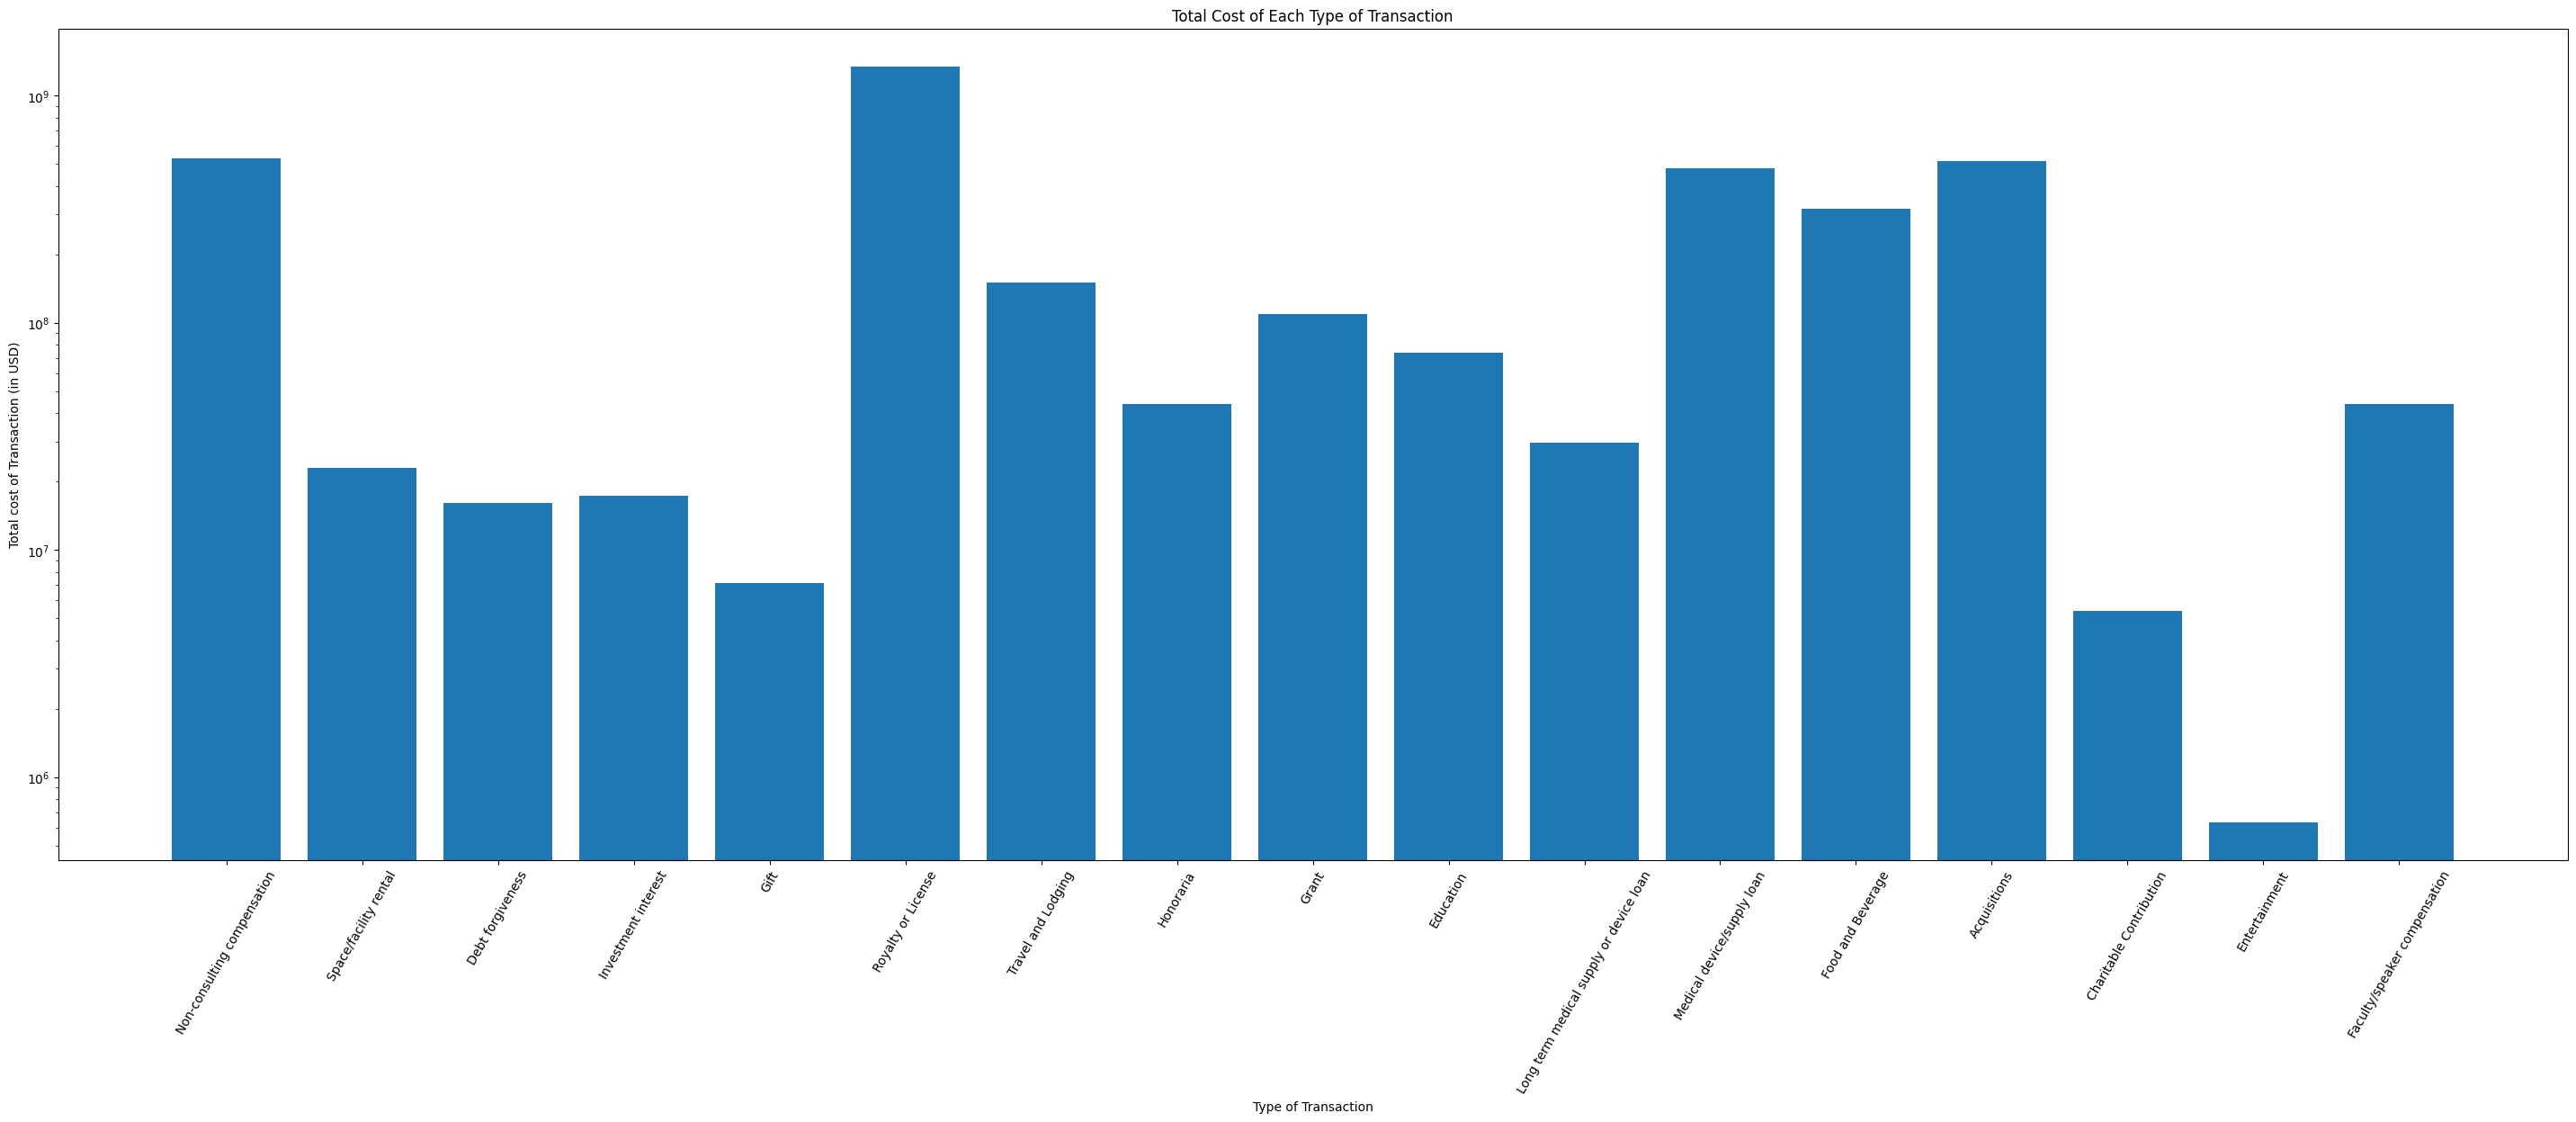

In [ ]:
plt.figure(figsize = (36, 12))
plt.xlabel("Type of Transaction")
plt.ylabel("Total cost of Transaction (in USD)")
plt.title("Total Cost of Each Type of Transaction")
plt.xticks(rotation=60)
plt.yscale('log')

plt.bar(frequency_and_cost_of_general_payments.payment_type,
            frequency_and_cost_of_general_payments.total_cost, align='center')

Though food and beverage was the most frequent type of transaction, it does not have the highest total summed cost — royalty and license fees does with more than a $1 Billion aggregated total. Following this, is non-faculty compensation and consulting fees. To get a granular view of transaction costs, we can look at the average cost per transaction by dividing the values of the two bar charts above.


Average Cost of Transaction

<BarContainer object of 17 artists>

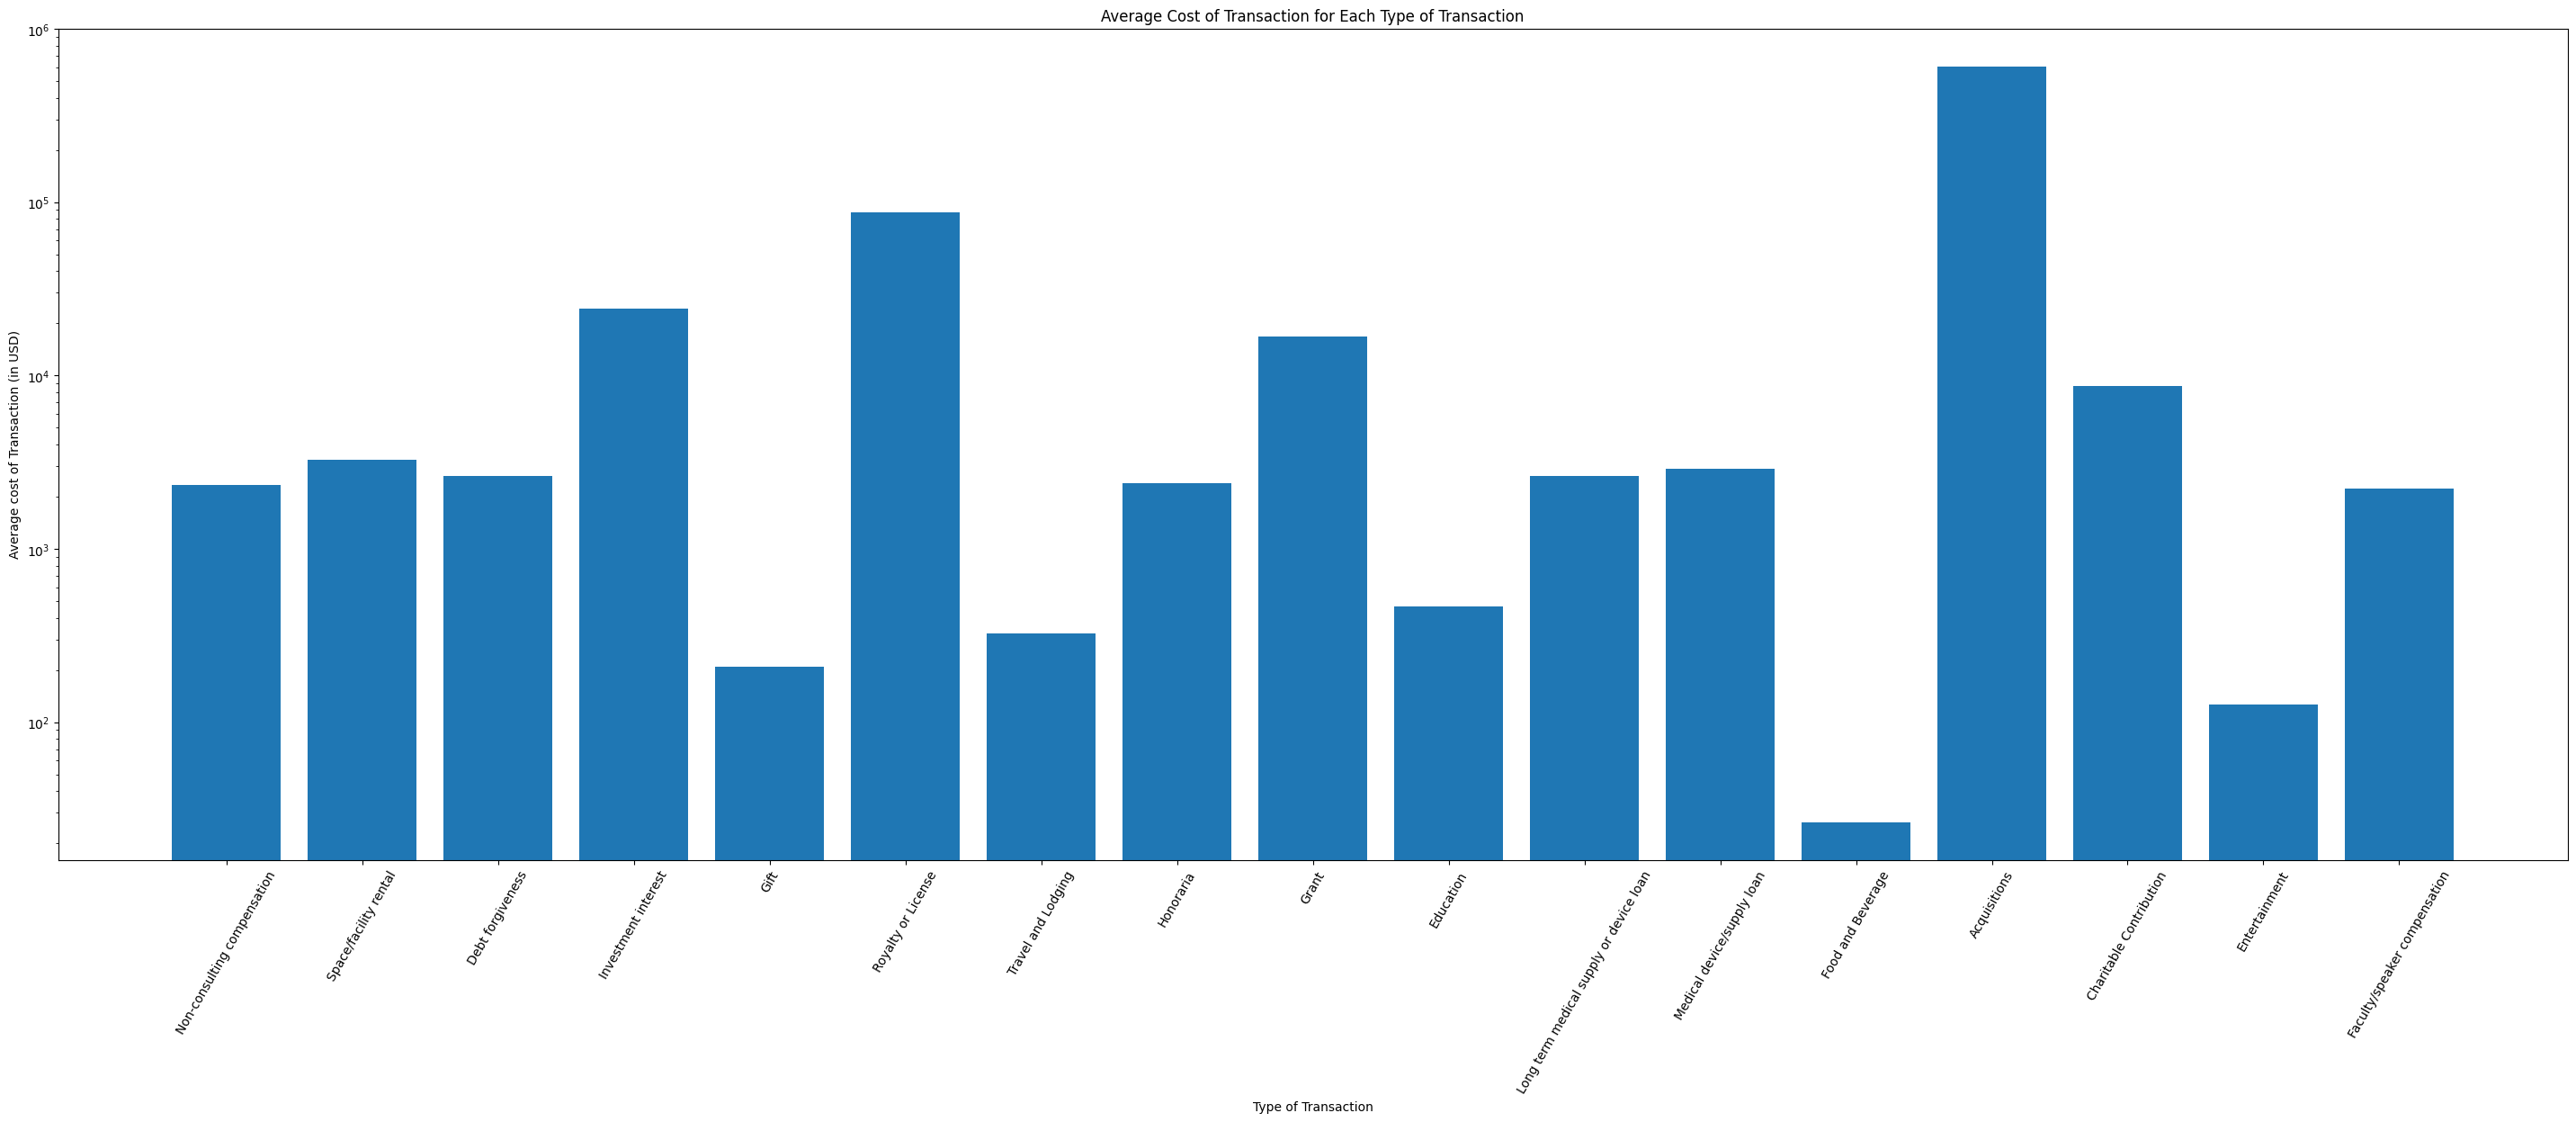

In [ ]:
plt.figure(figsize = (36, 12))
plt.xlabel("Type of Transaction")
plt.ylabel("Average cost of Transaction (in USD)")
plt.title("Average Cost of Transaction for Each Type of Transaction")
plt.xticks(rotation=60)
plt.yscale('log')

plt.bar(frequency_and_cost_of_general_payments.payment_type,
            frequency_and_cost_of_general_payments.total_cost/frequency_and_cost_of_general_payments.number_of_transactions, align='center')

To validate these values, we can see that the average cost per food and beverage transaction is well below $100 which makes sense. The most expensive average cost of a transaction is for acquisitions which also makes sense — they had a high total cost but comparatively a very low frequency since company acquisitions won't happen very often. Royalties and licensing costs are also another large expenditure per transaction, followed by investment interest.

State-by-state payment analysis

In [ ]:
%%bigquery state_payment --project $project_id

SELECT Recipient_State, SUM(Total_Amount_of_Payment_USDollars) AS total_cost
FROM `cs-145-project-22-401302.finalproject.general`
GROUP BY Recipient_State

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=state_payment.Recipient_State, # Spatial coordinates
    z = state_payment.total_cost.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    marker_line_color='green', # line markers between states
    colorscale = 'Greens',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Total transaction cost by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

California, Texas, and New York make sense to have comparatively higher summed transaction costs as these states have large cities where hospitals might be make more frequent and substantial transactions. However, Pennsylvania is surprisingly an extreme outlier with a ~826 million USD summed transaction cost. We can take a look at the breakdown of this state in particular:

In [ ]:
%%bigquery pa_payment --project $project_id


SELECT Recipient_State, Nature_of_Payment_or_Transfer_of_Value as payment_type, SUM(Total_Amount_of_Payment_USDollars) AS total_cost,
FROM `cs-145-project-22-401302.finalproject.general`
GROUP BY Recipient_State, Nature_of_Payment_or_Transfer_of_Value
HAVING Recipient_State = "PA"
ORDER BY total_cost DESC


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
pa_payment

,Recipient_State,payment_type,total_cost
0,PA,Royalty or License,7.383571e+08
1,PA,Compensation for services other than consultin...,2.490155e+07
2,PA,Consulting Fee,2.467133e+07
3,PA,Food and Beverage,1.357765e+07
4,PA,Travel and Lodging,6.973742e+06
5,PA,Grant,3.995489e+06
6,PA,Education,3.469928e+06
7,PA,Acquisitions,2.435662e+06
8,PA,Honoraria,2.139311e+06
9,PA,Compensation for serving as faculty or as a sp...,1.796023e+06


In [ ]:
import plotly.express as px
pd.options.mode.chained_assignment = None
pa_payment.payment_type.iloc[9] = "Faculty/speaker compensation" #Compensation for serving as faculty or as a speaker for a medical education program
pa_payment.payment_type.iloc[1] = "Non-consulting compensation" #Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program
pa_payment.payment_type.iloc[12] = "Space/facility rental" #Space rental or facility fees (teaching hospital only)
pa_payment.payment_type.iloc[13] = "Investment interest" #Current or prospective ownership or investment interest
pa_payment.payment_type.iloc[10] = "Medical device/supply loan" #Long term medical supply or device loan
fig = px.pie(pa_payment, values='total_cost', names='payment_type', title='2022 Percentages of Payment Types in PA')

fig.show()

The Royalties and Licensing transactions seem to be exorbitant costs. Let's double check if these payments might actually be the most expensive transactions in the entire dataset.

In [ ]:
%%bigquery --project $project_id

SELECT Recipient_State AS state, Nature_of_Payment_or_Transfer_of_Value AS payment_type, Total_Amount_of_Payment_USDollars AS cost,
FROM `cs-145-project-22-401302.finalproject.general`
ORDER BY Total_Amount_of_Payment_USDollars DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,state,payment_type,cost
0,PA,Royalty or License,2.530244e+08
1,PA,Royalty or License,1.775864e+08
2,PA,Royalty or License,1.599965e+08
3,PA,Royalty or License,1.257483e+08
4,CT,Acquisitions,7.217311e+07
5,CT,Acquisitions,4.541048e+07
6,CA,Acquisitions,3.947778e+07
7,CA,Acquisitions,2.372155e+07
8,TN,Royalty or License,2.221800e+07
9,TN,Acquisitions,2.115754e+07


Yes, these transactions were the most expensive in the entire 2022 dataset! After doing some digging, we found that researchers at University of Pennsylvania received large royalties for breakthrough developments in mRNA vaccine developments, specifically for gene therapy. Drew Weisman and Katalin Karikó in the medical department at University of Pennsylvania spearheaded the mRNA vaccine technology used in the COVID-19 vaccines and were now implementing this same technology in aiding damaged or erased genes. This explains the outlier transactions we see for PA as this is an extremely relevant payment in 2022 coming off mRNA vaccine development and deployment in the earlier 2020s.

Here is the article we referenced: https://www.thedp.com/article/2022/06/penn-royalties-mrna-covid-vaccines

With this finding, we now considered that the actual purpose of the transaction beyond just the payment type was important to consider (not just that this is a royalty, but what is the royalty awarded for?). We decided to explore categories which would give us a more granular look into the payments. For instance, we were interested in the column "Product_Category_or_Therapeutic_Area_1" which would tell us what the money specifically was used for. Let's take a look at the first 20 (non-"None") groups and their percentage of the total cost of all transactions.

In [ ]:
%%bigquery purpose_costs --project $project_id

WITH sum AS (
  SELECT SUM(Total_Amount_of_Payment_USDollars)  AS sum FROM `cs-145-project-22-401302.finalproject.general`
),
without_percent AS (
  SELECT Product_Category_or_Therapeutic_Area_1 as purpose, SUM(Total_Amount_of_Payment_USDollars) AS total_cost
  FROM `cs-145-project-22-401302.finalproject.general`
  GROUP BY Product_Category_or_Therapeutic_Area_1
  HAVING purpose != "None"
  ORDER BY total_cost DESC
  LIMIT 20
)
SELECT purpose, total_cost, total_cost/sum.sum * 100 AS percentage
FROM without_percent
CROSS JOIN sum

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
purpose_costs

,purpose,total_cost,percentage
0,INFECTIOUS DISEASES,7.166485e+08,19.310492
1,Oncology,7.855053e+07,2.116588
2,SURGERY,6.721037e+07,1.811021
3,NEUROSCIENCE,6.089737e+07,1.640913
4,IMMUNOLOGY,5.110008e+07,1.376920
5,Recon Knees,4.409133e+07,1.188065
6,Immunology,4.146325e+07,1.117250
7,Diabetes,4.143192e+07,1.116406
8,Spine,3.910401e+07,1.053679
9,Ortho-Knee,3.383268e+07,0.911640


In [ ]:
fig = px.pie(purpose_costs, values='total_cost', names='purpose', title='2022 Percentages of Product Cateories (out of first 20 categories)')
fig.show()

Infectious diseases takes the highest percentage of the summed transaction costs, followed by other lucrative transaction reasons, such as surgery, neuroscience, and immunology. This serves as an indiciator that product category would serve as an important feature for predicting transaction cost.

We also wanted to check to see if the distance between the states of the recipent and the manufacturer made a difference in the amount of payment. Perhaps if the distance between the manufacturer state and recipent state is larger, there could be more of a reason for the payment to have a higher cost.

In [ ]:
%%bigquery states_table --project $project_id
WITH final_cte AS (
  WITH outer_cte AS (
    WITH cte AS (
      SELECT state AS state_1, ST_GeogPoint(longitude, latitude) AS point_1
      FROM `cs-145-project-22-401302.finalproject.states`
    )
    SELECT *
    FROM cte
    CROSS JOIN (
      SELECT state AS state_2, ST_GeogPoint(longitude, latitude) AS point_2
      FROM `cs-145-project-22-401302.finalproject.states`
    )
  )
  SELECT state_1, state_2, ST_DISTANCE(point_1, point_2) AS dist
  FROM outer_cte
  ORDER BY dist DESC
)
SELECT final_cte.dist, Total_Amount_of_Payment_USDollars
FROM cs-145-project-22-401302.finalproject.general
LEFT JOIN final_cte
ON Recipient_State = final_cte.state_1 AND Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State = final_cte.state_2
ORDER BY Total_Amount_of_Payment_USDollars DESC

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
states_table

,dist,Total_Amount_of_Payment_USDollars
0,NaN,2.530244e+08
1,NaN,1.775864e+08
2,NaN,1.599965e+08
3,NaN,1.257483e+08
4,2.737732e+05,7.217311e+07
...,...,...
13144764,2.311202e+06,1.000000e-02
13144765,0.000000e+00,1.000000e-02
13144766,2.868558e+06,1.000000e-02
13144767,0.000000e+00,1.000000e-02


Text(0.5, 1.0, 'Scatterplot of Transaction Cost vs Distance between Manufacture and Recipient States')

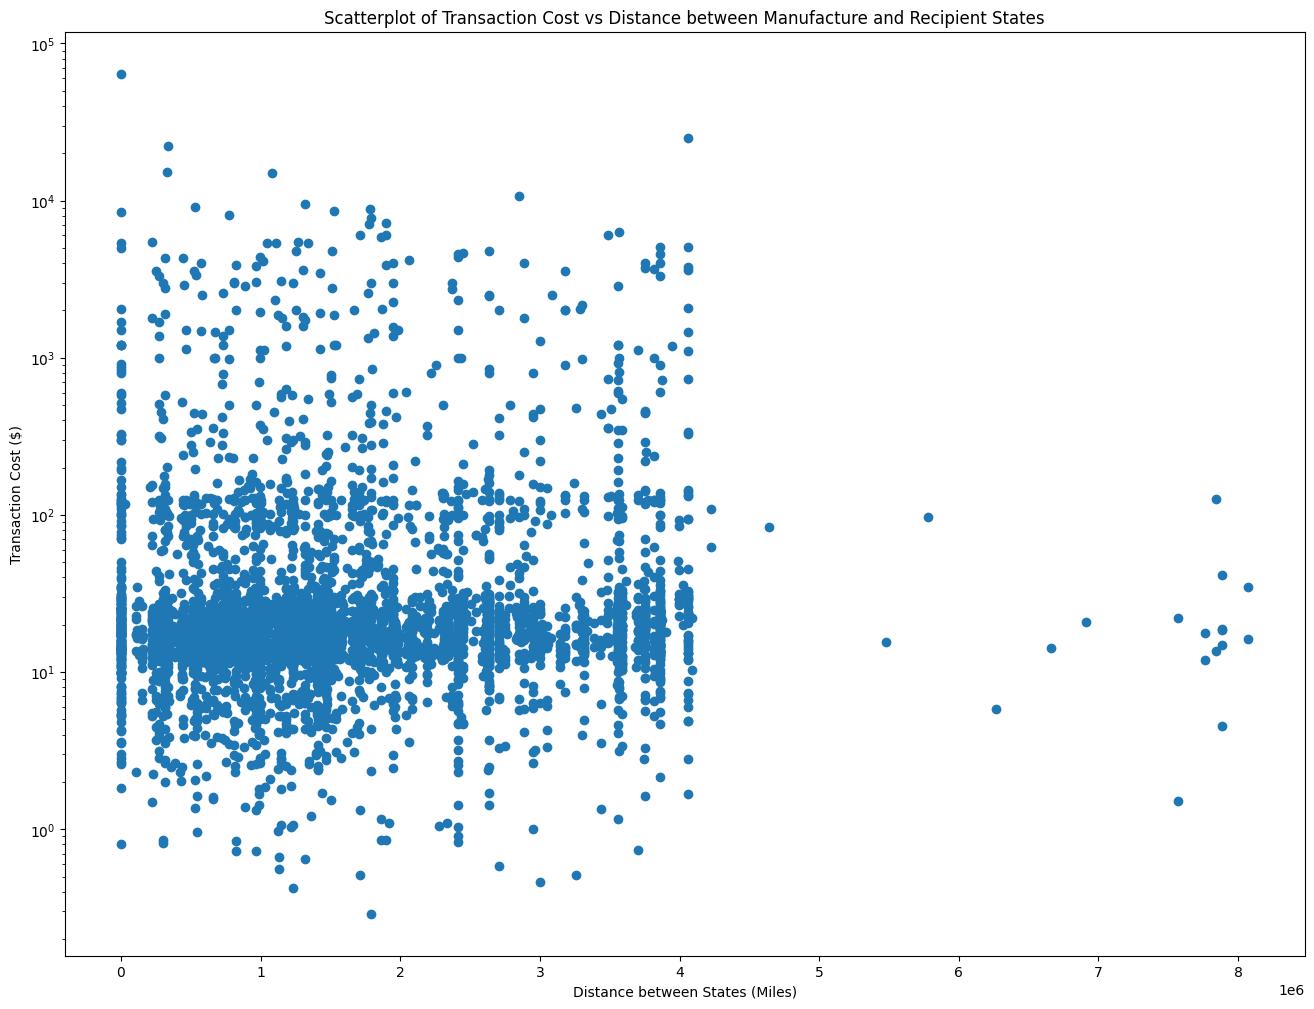

In [ ]:
import numpy as np

indices = np.random.choice(len(states_table), size=5000, replace=False)
states_table.dist = states_table.dist[indices]
states_table.Total_Amount_of_Payment_USDollars = states_table.Total_Amount_of_Payment_USDollars[indices]
states_table.dist = states_table.dist[states_table.Total_Amount_of_Payment_USDollars < 100000]
states_table.Total_Amount_of_Payment_USDollars = states_table.Total_Amount_of_Payment_USDollars[states_table.Total_Amount_of_Payment_USDollars < 100000]

plt.figure(figsize = (16, 12))
plt.xlabel("Distance between States (Miles)")
plt.ylabel("Transaction Cost ($)")
plt.yscale('log')
plt.scatter(states_table.dist, states_table.Total_Amount_of_Payment_USDollars)
plt.title('Scatterplot of Transaction Cost vs Distance between Manufacture and Recipient States')

From this scatterplot, we don't see too much of a correlation between the state distance and the cost of the transaction. However, we do want to experiment with this engineered feature in our ML modeling.

Finally below, we join our `general` table with our `research` table. We see that royalty/licensing fees make up the highest percentage (89.3%) of PA's total medical open payments in 2022 with a total cost of over 738 million USD.

In [ ]:
%%bigquery --project $project_id

SELECT *
FROM `cs-145-project-22-401302.finalproject.general`  as general
JOIN `cs-145-project-22-401302.finalproject.research` as research
ON general.Covered_Recipient_NPI = research.Principal_Investigator_1_NPI
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Covered_Recipient_Profile_ID,Covered_Recipient_NPI,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,...,Preclinical_Research_Indicator,Delay_in_Publication_Indicator_1,Name_of_Study,Dispute_Status_for_Publication_1,Record_ID_1,Program_Year_1,Payment_Publication_Date_1,ClinicalTrials_Gov_Identifier,Research_Information_Link,Context_of_Research
0,NEW,Covered Recipient Physician,<NA>,<NA>,None,177783,1902916778,BRIAN,B,BORG,...,False,False,A Study of ALN-HSD in Healthy Adult Subjects a...,False,910085971,2022,2023-06-30,None,None,None
1,NEW,Covered Recipient Physician,<NA>,<NA>,None,177783,1902916778,BRIAN,B,BORG,...,False,False,A Study of ALN-HSD in Healthy Adult Subjects a...,False,910086221,2022,2023-06-30,None,None,None
2,NEW,Covered Recipient Physician,<NA>,<NA>,None,177783,1902916778,BRIAN,B,BORG,...,False,False,A Study of ALN-HSD in Healthy Adult Subjects a...,False,910086203,2022,2023-06-30,None,None,None
3,NEW,Covered Recipient Physician,<NA>,<NA>,None,177783,1902916778,BRIAN,B,BORG,...,False,False,A Study of ALN-HSD in Healthy Adult Subjects a...,False,910086213,2022,2023-06-30,None,None,None
4,NEW,Covered Recipient Physician,<NA>,<NA>,None,177783,1902916778,BRIAN,B,BORG,...,False,False,"A TWO-PART, RANDOMIZED, PLACEBO CONTROLLED, DO...",False,943948851,2022,2023-06-30,None,None,HCP did not receive direct payment from GSK. H...




---

---

## 3: Predicting Payment Amount

In this section, we predict the payment amount using some of features we ascertained from our analysis. First, we implement a database baseline with a basic K-Nearest Neighbor model for predicting the payment amounts. Then, we use linear regression, experimenting with a few feature engineering choices. We compare performance for these two prediction models.

### 3.1: Setting Up Data for Predictions

We use our general payments data table for all of our training and predictions.

We split our data into train, val, and test splits. Firstly, we consider  0.5% of our total data to accomodate performing manual KNN vs. on millions of rows. Then, we split that reduced dataset 8-1-1 for train-val-test.

We use the following features based on our above analysis:
- Recipient_State AS state,
- Covered_Recipient_Specialty_1 AS specialty,
- Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name AS gpo_name,
- Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country AS gpo_country,
- Nature_of_Payment_or_Transfer_of_Value AS payment_type,
- Related_Product_Indicator as related_product,
- Covered_or_Noncovered_Indicator_1 AS covered,
- Product_Category_or_Therapeutic_Area_1 as product_category,
- Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 as product_name,
- Date_of_Payment AS date.

Our target variable is:
Total_Amount_of_Payment_USDollars AS cost

For linear regression, we also experiment with a few more different features. We have one to see if the state of the payment entity was PA, since our analysis showed a high amount of costs from that state. We have another to check for key words for the product category, based on some categories likely associated with vaccines and other relevant categories that have a high cost for 2022. We have a fourth feature we tried but was less successful, which measured the length of the product_name, with the hypothesis that longer and more complicated products wouls cost more.

In [ ]:
%%bigquery train_data --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-22-401302.finalproject.full_data` (
  id STRING,
  state STRING,
  specialty STRING,
  gpo_name STRING,
  gpo_country STRING,
  payment_type STRING,
 related_product BOOL,
  covered STRING,
  product_category STRING,
  product_name STRING,
  date DATE,
  distance FLOAT64,
  cost FLOAT64
);

INSERT INTO `cs-145-project-22-401302.finalproject.full_data` (id, state, specialty, gpo_name, gpo_country, payment_type, related_product, covered, product_category, product_name, date, distance, cost)

WITH final_cte AS (
  WITH outer_cte AS (
    WITH cte AS (
      SELECT state AS state_1, ST_GeogPoint(longitude, latitude) AS point_1
      FROM `cs-145-project-22-401302.finalproject.states`
    )
    SELECT *
    FROM cte
    CROSS JOIN (
      SELECT state AS state_2, ST_GeogPoint(longitude, latitude) AS point_2
      FROM `cs-145-project-22-401302.finalproject.states`
    )
  )
  SELECT state_1, state_2, ST_DISTANCE(point_1, point_2) AS dist
  FROM outer_cte
  ORDER BY dist DESC
)
SELECT GENERATE_UUID() as id, Recipient_State AS state,
Covered_Recipient_Specialty_1 AS specialty,
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name AS gpo_name,
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country AS gpo_country,
Nature_of_Payment_or_Transfer_of_Value AS payment_type,
Related_Product_Indicator as related_product,
Covered_or_Noncovered_Indicator_1 AS covered,
Product_Category_or_Therapeutic_Area_1 as product_category,
  Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1 as product_name,
Date_of_Payment AS date,
final_cte.dist as distance,
Total_Amount_of_Payment_USDollars AS cost
FROM `cs-145-project-22-401302.finalproject.general`
LEFT JOIN final_cte
ON Recipient_State = final_cte.state_1 AND Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State = final_cte.state_2





Query is running:   0%|          |

In [ ]:
%%bigquery train_data --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-22-401302.finalproject.train_data` (
  id STRING,
  state STRING,
  specialty STRING,
  gpo_name STRING,
  gpo_country STRING,
  payment_type STRING,
 related_product BOOL,
  covered STRING,
  product_category STRING,
product_name STRING,
  date DATE,
  distance FLOAT64,
  cost FLOAT64
);

INSERT INTO `cs-145-project-22-401302.finalproject.train_data` (id, state, specialty, gpo_name, gpo_country, payment_type, related_product, covered, product_category, product_name, date, distance, cost)

SELECT
   *
FROM
   `cs-145-project-22-401302.finalproject.full_data`
WHERE MOD(ABS(FARM_FINGERPRINT(id)),5000) < 8





Query is running:   0%|          |

In [ ]:
%%bigquery val_data --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-22-401302.finalproject.val_data` (
  id STRING,
  state STRING,
  specialty STRING,
  gpo_name STRING,
  gpo_country STRING,
  payment_type STRING,
 related_product BOOL,
  covered STRING,
    product_category STRING,
product_name STRING,
  date DATE,
  distance FLOAT64,
  cost FLOAT64
);

INSERT INTO `cs-145-project-22-401302.finalproject.val_data` (id, state, specialty, gpo_name, gpo_country, payment_type, related_product, covered, product_category, product_name, date, distance, cost)

SELECT
   *
FROM
   `cs-145-project-22-401302.finalproject.full_data`
WHERE MOD(ABS(FARM_FINGERPRINT(id)),5000) = 8





Query is running:   0%|          |

In [ ]:
%%bigquery test_data --project $project_id
CREATE OR REPLACE TABLE `cs-145-project-22-401302.finalproject.test_data` (
  id STRING,
  state STRING,
  specialty STRING,
  gpo_name STRING,
  gpo_country STRING,
  payment_type STRING,
 related_product BOOL,
  covered STRING,
    product_category STRING,
product_name STRING,
  date DATE,
  distance FLOAT64,
  cost FLOAT64
);

INSERT INTO `cs-145-project-22-401302.finalproject.test_data` (id, state, specialty, gpo_name, gpo_country, payment_type, related_product, covered, product_category, product_name, date, distance, cost)

SELECT
   *
FROM
   `cs-145-project-22-401302.finalproject.full_data`
WHERE MOD(ABS(FARM_FINGERPRINT(id)),5000) = 9





Query is running:   0%|          |

### 3.2: K-Nearest Neighbors

Here we implement a KNN baseline model.
Let us use our evaluation data with our training data first. Then, we experimented a bit with feature engineering here too to tune our distance function by playing with distance weights depending on features we considered important. Then, we used our distance function with KNN on our test set.

Since we have primarily categorical variables as our features, our distance function for two categorical variables is $x$ if they are different and $0$ if they are the same, for some positive number $x$, which is usually 1. Then, we sum these differences across all the different features.

We also experiment with different values of K, and finally choose $K = 10$.


### Training/Validation Set:

In [ ]:
%%bigquery knn --project $project_id

WITH diff AS (
SELECT
  val.id AS id,
  CASE
  WHEN val.state = train.state THEN 0
  ELSE 1
  END AS statediff,
  CASE
  WHEN val.specialty = train.specialty THEN 0
  ELSE 1
  END AS specialtydiff,
  CASE
  WHEN val.gpo_name = train.gpo_name THEN 0
  ELSE 1
  END AS gpo_name_diff,
  CASE
  WHEN val.gpo_country = train.gpo_country THEN 0
  ELSE 1
  END AS gpo_country_diff,
  CASE
  WHEN val.payment_type = train.payment_type THEN 0
  ELSE 1
  END AS payment_type_diff,
  CASE
  WHEN val.covered = train.covered THEN 0
  ELSE 1
  END AS covered_diff,
  ABS(DATE_DIFF(train.date, val.date, month)) as month_diff,
  train.cost as cost
 FROM `cs-145-project-22-401302.finalproject.val_data` AS val
  CROSS JOIN `cs-145-project-22-401302.finalproject.train_data` AS train
),
top_k AS (
SELECT id,
cost,
ROW_NUMBER() OVER (PARTITION BY id ORDER BY statediff + specialtydiff + gpo_name_diff + gpo_country_diff + payment_type_diff + covered_diff + month_diff/11 ASC) AS row_num
FROM diff
),
assignments AS (
SELECT
  id, AVG(cost) AS pred_cost
FROM
  top_k
WHERE
  row_num <= 10
GROUP BY
  id ),
MSE AS (
  SELECT POWER(assignments.pred_cost - val_data.cost, 2) AS squared_difference
  FROM cs-145-project-22-401302.finalproject.val_data as val_data
  JOIN
  assignments
  ON
  assignments.id = val_data.id
)
SELECT
  SQRT(AVG(squared_difference)) AS rmse
FROM
  MSE;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn

,rmse
0,423.514493


We modify our features slightly by testing for improving this root mean squared error.

In [ ]:
%%bigquery knn_modified --project $project_id

WITH diff AS (
SELECT
  val.id AS id,
  CASE
  WHEN val.state = train.state THEN 0
  ELSE 2
  END AS statediff,
  CASE
  WHEN val.specialty = train.specialty THEN 0
  ELSE 0.5
  END AS specialtydiff,
  CASE
  WHEN val.gpo_name = train.gpo_name THEN 0
  ELSE 2.5
  END AS gpo_name_diff,
  CASE
  WHEN val.gpo_country = train.gpo_country THEN 0
  ELSE 2
  END AS gpo_country_diff,
  CASE
  WHEN val.payment_type = train.payment_type THEN 0
  ELSE 0.5
  END AS payment_type_diff,
   CASE
  WHEN val.related_product = train.related_product THEN 0
  ELSE 1
  END AS related_product_diff,
  CASE
  WHEN val.covered = train.covered THEN 0
  ELSE 1
  END AS covered_diff,
  ABS(DATE_DIFF(train.date, val.date, month))/11  as month_diff,
  train.cost as cost
 FROM `cs-145-project-22-401302.finalproject.val_data` AS val
  CROSS JOIN `cs-145-project-22-401302.finalproject.train_data` AS train
),
top_k AS (
SELECT id,  cost,
ROW_NUMBER() OVER (PARTITION BY id ORDER BY  statediff + specialtydiff + gpo_name_diff + gpo_country_diff + payment_type_diff + covered_diff + month_diff  ASC) AS row_num
FROM diff
),
assignments AS (
SELECT
  id, AVG(cost) AS pred_cost
FROM
  top_k
WHERE
  row_num <= 10
GROUP BY
  id ),
MSE AS (
  SELECT POWER(assignments.pred_cost - val_data.cost, 2) AS squared_difference
  FROM cs-145-project-22-401302.finalproject.val_data as val_data
  JOIN
  assignments
  ON
  assignments.id = val_data.id
)
SELECT
  SQRT(AVG(squared_difference)) AS rmse
FROM
  MSE;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_modified

,rmse
0,536.194561


#### Testing Predictions

Now we can use this specific distance function and features and k-value for our test set.

In [ ]:
%%bigquery knn_test --project $project_id

WITH diff AS (
SELECT
  test.id AS id,
  CASE
  WHEN test.state = train.state THEN 0
  ELSE 2
  END AS statediff,
  CASE
  WHEN test.specialty = train.specialty THEN 0
  ELSE 0.5
  END AS specialtydiff,
  CASE
  WHEN test.gpo_name = train.gpo_name THEN 0
  ELSE 2.5
  END AS gpo_name_diff,
  CASE
  WHEN test.gpo_country = train.gpo_country THEN 0
  ELSE 2
  END AS gpo_country_diff,
  CASE
  WHEN test.payment_type = train.payment_type THEN 0
  ELSE 0.5
  END AS payment_type_diff,
   CASE
  WHEN test.related_product = train.related_product THEN 0
  ELSE 1
  END AS related_product,
  CASE
  WHEN test.covered = train.covered THEN 0
  ELSE 1
  END AS covered_diff,
  ABS(DATE_DIFF(train.date, test.date, month)) as month_diff,
  train.cost as cost
 FROM `cs-145-project-22-401302.finalproject.test_data` AS test
  CROSS JOIN `cs-145-project-22-401302.finalproject.train_data` AS train
),
top_k AS (
SELECT id,
cost,
ROW_NUMBER() OVER (PARTITION BY id ORDER BY statediff + specialtydiff + gpo_name_diff + gpo_country_diff + payment_type_diff ASC) AS row_num
FROM diff
),
assignments AS (
SELECT
  id, AVG(cost) AS pred_cost
FROM
  top_k
WHERE
  row_num <= 10
GROUP BY
  id ),
MSE AS (
  SELECT POWER(assignments.pred_cost - test_data.cost, 2) AS squared_difference
  FROM `cs-145-project-22-401302.finalproject.test_data` as test_data
  JOIN
  assignments
  ON
  assignments.id = test_data.id
)
SELECT
  SQRT(AVG(squared_difference)) AS rmse
FROM
  MSE;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
knn_test

,rmse
0,1281.072466


With the above modifications, our RMSE for our test data is about 1281.1.

### Linear Regression

We now compare this to a linear regression ML model. We do some basic feature engineering, choosing the month specifically from the date as the most salient feature, as well as having an additional feature for whether the transaction was in PA or not, in light of our analysis about the high amount of costs in PA specifically. We have another feature engineered to check for some of the top product categories for if the payment was associated with a product. Finally, we added the engineered feature of distances between manufacturer state and recipient state.

We had a fourth feature we tried but was less successful, which measured the length of the product_name, with the hypothesis that longer and more complicated products wouls cost more. We chose not to include it since it worsened the RMSE.

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL `cs-145-project-22-401302.finalproject.linear_model`
OPTIONS(model_type='linear_reg') AS
SELECT
  cost as label,
  CASE
  WHEN state = 'PA' THEN 1
  ELSE 0
  END AS state_pa,
  specialty, gpo_name, gpo_country, payment_type, related_product,
  CONTAINS_SUBSTR(product_category, 'INFECTIOUS DISEASES') OR  CONTAINS_SUBSTR(product_category, 'ONCOLOGY') OR
  CONTAINS_SUBSTR(product_category, 'SURVERY') OR  CONTAINS_SUBSTR(product_category, 'IMMUNOLOGY') OR
  CONTAINS_SUBSTR(product_category, 'DIABETES') OR  CONTAINS_SUBSTR(product_category, 'Cardiology/Vascular Diseases') OR
  CONTAINS_SUBSTR(product_category, 'neuroscience') OR  CONTAINS_SUBSTR(product_category, 'knee') AS top_cats,
  distance
  EXTRACT(MONTH FROM date) as month

FROM
  `cs-145-project-22-401302.finalproject.train_data`

Executing query with job ID: a711f7d7-0fa6-46a9-ad8a-2ec97ece2218
Query executing: 0.45s


ERROR:
 400 Syntax error: Expected end of input but got keyword EXTRACT at [15:3]

Location: US
Job ID: a711f7d7-0fa6-46a9-ad8a-2ec97ece2218



In [ ]:
%%bigquery  --project $project_id

SELECT
  SQRT(loss) as rmse,		duration_ms
FROM
  ML.TRAINING_INFO(MODEL `cs-145-project-22-401302.finalproject.linear_model`)

We run our model on our validation set. This was used in experimenting with features.

In [ ]:
%%bigquery --project $project_id

SELECT
  SQRT(mean_squared_error) as rmse
FROM
  ML.EVALUATE(MODEL `cs-145-project-22-401302.finalproject.linear_model`, (
SELECT
  cost as label,
  CASE
  WHEN state = 'PA' THEN 1
  ELSE 0
  END AS state_pa,
  specialty, gpo_name, gpo_country, payment_type, related_product,
  CONTAINS_SUBSTR(product_category, 'INFECTIOUS DISEASES') OR  CONTAINS_SUBSTR(product_category, 'ONCOLOGY') OR
  CONTAINS_SUBSTR(product_category, 'SURVERY') OR  CONTAINS_SUBSTR(product_category, 'IMMUNOLOGY') OR
  CONTAINS_SUBSTR(product_category, 'DIABETES') OR  CONTAINS_SUBSTR(product_category, 'Cardiology/Vascular Diseases') OR
  CONTAINS_SUBSTR(product_category, 'neuroscience') OR  CONTAINS_SUBSTR(product_category, 'knee') as top_cats,
  EXTRACT(MONTH FROM date) as month
FROM
  `cs-145-project-22-401302.finalproject.val_data`

))

We finally run our model on our test data. Our final RMSE is 827.7

In [ ]:
%%bigquery --project $project_id

SELECT
  SQRT(mean_squared_error) as rmse
FROM
  ML.EVALUATE(MODEL `cs-145-project-22-401302.finalproject.linear_model`, (
SELECT
 cost as label,
  CASE
  WHEN state = 'PA' THEN 1
  ELSE 0
  END AS state_pa,
  specialty, gpo_name, gpo_country, payment_type, related_product,
  CONTAINS_SUBSTR(product_category, 'INFECTIOUS DISEASES') OR  CONTAINS_SUBSTR(product_category, 'ONCOLOGY') OR
  CONTAINS_SUBSTR(product_category, 'SURVERY') OR  CONTAINS_SUBSTR(product_category, 'IMMUNOLOGY') OR
  CONTAINS_SUBSTR(product_category, 'DIABETES') OR  CONTAINS_SUBSTR(product_category, 'Cardiology/Vascular Diseases') OR
  CONTAINS_SUBSTR(product_category, 'neuroscience') OR  CONTAINS_SUBSTR(product_category, 'knee') as top_cats,
  EXTRACT(MONTH FROM date) as month
  FROM
  `cs-145-project-22-401302.finalproject.test_data`

))

### 3.4: Discussion

Comparing our baseline KNN model to our linear regression model, we see that our KNN model actually does better than our linear regression model, with a much lower root mean squared error (RMSE) of 705.8 vs. 843.3. Ways to improve our linear regression model would be for more precise feature engineering. Already the inclusion of the feature engineering we have dramatically improved our linear regression than without them. We also believe that converting the task from regression to classification would be very beneficial for future work, because it would help to categorize expenditures as "low cost, medium cost, high cost, very high cost", so that the accuracy of the performance for the bins can be related to one another. We believe this metric would help in guiding our feature analysis as well. The positive tradeoff of having a linear regression model with continuous data is having a more generalizable cost output that can then be classified if necessary, or kept in its numeric amount.

Another consideration is that most of our features are categorical themselves, rather than numerical. This is a limitation that is complicated by our dataset which only has numerical data for the cost. However, we tried to incorporate numerical data by extracting it from the date. In addition, with our feature extraction from the product category and name, we are able to have more complex categories. The category for whether PA is a state or not was especially notable since it reflects our careful analysis from Section 2 of the disproporationate costs coming out of PA.

#### IO Costs

We perform a basic analysis of IO costs for the methods above. We make some assumptions. $C_R = C_W = 1$. Let us also assume $PageSize = 100 KB$. Our train data is (rounded) 21,000 rows, val data is 2,600 rows, test data is 2,600 rows. Assume buffer B = 2.

For KNN, our IO costs are calculated as follows:
- Let us calculate t he first CROSS JOIN with SMJ, HPJ, and BNLJ. Then, we assume that BigQuery chooses the one with the lowest IO cost from internal optimizations and use its IO cost in our calculation.
  - with SMJ: We have P(Train data) is 9.21 MB / 100 KB is 92.1. With buffer B = 2, we have BigSort(Train data) = (C_R + C_W) * 92.1 * (1+3) = 736. Similarly, we have P(val data) = P(test data) =  1.29 MB / 100 KB = 12.9, so BigSort(val data) =2 * 12.9 * (1 + 1) = 51.6. MergeJoin worst case is MergeJoin(Train data, val Data) = 1 * 92.1 * 12.9 = 1188.09. Now, the OUT size is the product of the page sizes of the train data, divided by the page size, which will be 92.1 * 2,600 = 1188.09. Finally, our total is SMJ = BigSort(train) + BigSort(val) + MergeSort(train, val) + Cw * OUT = 736 + 51.6 + 1188.09 + 1188.09 = 3163.78.
  - with HPJ: HPJ(train, val) = HP(train) + HP(val) + PJ(train, val) + Cw * OUT. HP(train) = (Cr + Cw) * P(train) = 2 * 92.1 = 184.2. HP(val) = 2 * 12.9 = 25.8. PJ(train, val) = 1 * (92.1 + 12.9) = 104. OUT = 1188.09. Using this, HPJ(train, val) = 184.2 + 25.8 + 104 + 1188.09 = 1502.09.
  - with BNLJ: BNLJ(train, val) = Cr * (P(train) + P(val) * P(train)/B) + Cw * OUT = 92.1 + 12.9 * 92.1/2 + 1*1188.09 = 1874.235.
  - Finally, comparing these we see that HPJ has the lowest IO, so we have that with 1502.09.
- Next, there are the intermediate outputs and read/writes for those. First, `diff` is half the size of the full Cross-joined table, so it should be Cw * OUT = 1 * 1188.09/2 = 594.045. Then, it is read again, which is another 594.045. Then, `top_k` is written, which is 3/5 the size of `diff`, so that is 3/5 * 594.045 =  356.43. Then, it is read again, which is another 356.43. Then, the next write `assignment` groups by the validation id, so that is smaller by the number of pages in training data table, which is 12.9, and it is 2/3 the size per row,  so it is 356.43/92.1 * 2/3 = 2.58. It is then read, so another 2.58. Then, the next write is `MSE`. Here we have a second join. We join 'assignments' with the `val_data`. Let us calculate the three possibilities for IO with the three joins as previously.
   - SMJ: We have P(assignments) = 2.58, and P(val) = 12.9. We can use our intermediates for BigSort(val), so we have BigSort(assignments) = 2 * 2.58 * (1) = 5.16. Then, we have MergeJoin(diff, val) = 2.58 * 12.9 = 33.28. Then, the OUT for these two will be the sum of the two, since there is a clear correspondence, so that will be 2.58 + 12.9 = 15.48. Adding these all, we have SMJ(assignments, val) = BigSort(val) + BigSort(assignments) + MergeJoin(assignments, val) + 1 * OUT = 5.16 + 33.28 + 15.48 = 53.92.
   - HPJ: We have HPJ(assignments, val) = HP(assignments) + HP(val) + PJ(assignments, val) + 1 * OUT. We have HP(assignments) = 2 * 2.58 = 5.16, and HP(val) is an already computed intermediate. HThen we have PJ(assignments, val) = 1 * (2.58+12.9) = 15.48. Adding these, we have HPJ(assignments, val) = 5.16 + 15.48 + 15.48 = 53.92.
   - BNLJ: We have BNLJ(assignments, val) = 1 * (2.58 + 12.9 * 2.58/2) + 1 * 15.48) = 34.7.
   - The smallest is BNLJ, so we have 34.7.
- Now, have the write for MSE, which is half the size of assignments, so that is 2.58 * 1/2 = 1.29. We similarly have the read for MSE, which is again 1.29. Finally, we have our final write (after the RMSE square root), which is the same size of 1.29.
- Adding all of these IO costs up, we get $1502.09 + 594.045 + 594.045 + 356.43 + 356.43 + 2.58 + 2.58 + 34.7 + 1.29 + 1.29 + 1.29 = 3446.77$.

For linear regression, our IO costs are:
- It should be just the size in number of pages of the input and size in number of pages of the output, namely for the input of the training data, the number of pages is the size of training data, (it is just this as BigQuery has internal optimizations to do linear regression in 1 iteration) which is 9.21 MB divided by page size, getting us 92.1. Then, the size of the output is just the one iteration for linear regression, negligible. So the total IO cost is about $92.1.$

#### Time / Monetary Cost

For KNN, the time it takes for the query is 4 minutes and 6 seconds of slot time, with 3.1 GB shuffled. At 1 GB for 0.005 dollars, that is about 0.016 dollars.

For linear regression, the time is 25 seconds, with negligible cost.

#### Analysis

In terms of IO as well as time/monetary cost, the ML based implementation with linear regression is much better. It also benefits from the many Big Query optimizations to complete the task. Meanwhile, the KNN baseline solution is much more expensive and computationally intensive.

---




---


## 4: Conclusion


 Ultimately, this project has strived to understand the relationship between drug/medical companies and health care providers through documenting and interpreting insights from Open Payments Data's 2022 Payment Data. We believe that further `
   exploration of this dataset can help enrich our understanding of the role of money in shaping the landscape of healthcare. It is also of interest to augment this dataset by relating it to other sources of data regarding drug/medical device companies, with sources such as [this spreadsheet](https://docs.google.com/spreadsheets/d/1Cs-p3ZBNTdFfj4BSsbLYo3y2mqmrDPbE_bcNUn3WLAA/edit?usp=sharing) which contains financial revenue information about several drug/medical device companies. In addition, expanding the data collection with Open Payments Data itself would be worthwhile to relate the 2022 Payment Data to that which was collected in previous years. Altogether, there is a lot of interesting information in these datasets that makes it an exciting space to further research on the dynamic and important role of pharma money in health care. In today's era, with rampant inequality in access to health care resources as well as broader exploitative practices weaponed by large pharmaceutical companies, it is of social concern to understand how these firms are influencing the health care field.

 In terms of our specific findings, we showcased the data in various visualizations, depicting how the payment amounts vary across features like geographic location (state), specific drug/medical device company, and nature of payment. We also considered the task of predicting mayment amount given features about health care providers and the drug medical device company. We implemented K-Nearest Neighbors (KNN) to predict the payment amount given those features about health care providers and the drug medical device company. We also implemented linear regression for the same task with some basic feature engineering. We find that linear regression performs slightly better than KNN, although KNN benefits from more optimizability based on feature engineering. We utilized feature engineering for a few features such as more specific analysis of state (whether it is PA or not), as well as based on the words in the name of the product in the transaction. We believe that future work would benefit from more experimentation in this realm of feature engineering. Altogether, these methods hold promise for trying to understand what features are relevant in the financial transaction value. With more investigation and data, this line of analysis could likely be adapted to identify discrepancies, and possible cases of financial tampering. We hope that this project serves as a meaningful exploration of the use of Open Payments Data's payment data on understanding the relationship between drug/medical device companies and health care providers.

  
